In [1]:
import os
import os.path as op
# import mne
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

### Decoder from tfr_morlet

In [12]:
data = {}
root = Path('../data/bids/derivatives/decoding')
for file in root.rglob("*"):
    if 'log_reg_scoresx' not in file.name:
        continue
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

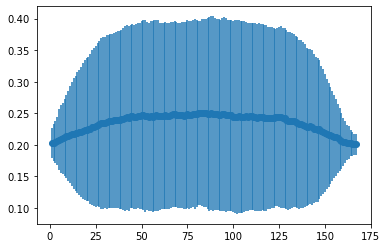

In [116]:
# Mean over subjects
means = df.mean(axis = 0)

# Standard deviation
stds = df.std(axis = 0)

# Plot
x = np.arange(len(means))+1
plt.errorbar(x, means, yerr = stds, fmt = 'o')
plt.show()

In [105]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]

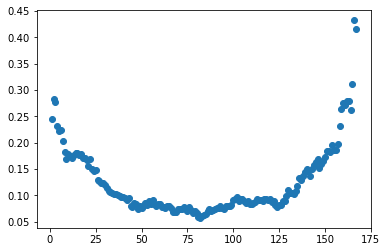

In [118]:
plt.scatter(x, p)
plt.show()

0.057383184954067225

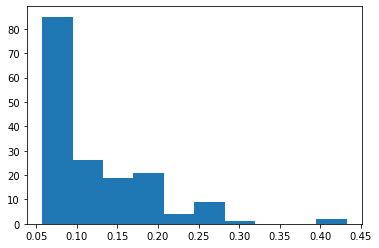

In [120]:
plt.hist(p)
min(p)

### Decoder from stft

In [17]:
data = {}
root = Path('../data/bids/derivatives/decoding')
for file in root.rglob("*"):
    if 'stft_scores' not in file.name:
        continue
    if 'sub-2_' in file.name:
        print(file)
        continue
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

../data/bids/derivatives/decoding/sub-2/sub-2_task-pitch_run-1_desc-stft_scores.npy


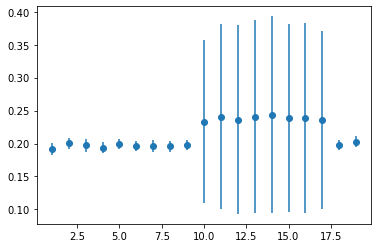

In [18]:
# Mean over subjects
means = df.mean(axis = 0)

# Standard deviation
stds = df.std(axis = 0)

# Plot
x = np.arange(len(means))+1
plt.errorbar(x, means, yerr = stds, fmt = 'o')
plt.show()

In [19]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]

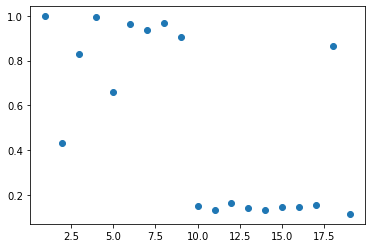

In [20]:
plt.scatter(x, p)
plt.show()